In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/train_set', 
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 436 images belonging to 2 classes.


In [7]:
test_dataset = test.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/test_set',
                                        target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [8]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [9]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [10]:
model =Sequential()

In [11]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [12]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [15]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
14/14 [==============================] - 128s 9s/step - loss: 0.5890 - accuracy: 0.6445 - val_loss: 0.3435 - val_accuracy: 0.9421
Epoch 2/5
14/14 [==============================] - 27s 2s/step - loss: 0.2663 - accuracy: 0.9083 - val_loss: 0.0515 - val_accuracy: 0.9835
Epoch 3/5
14/14 [==============================] - 27s 2s/step - loss: 0.2169 - accuracy: 0.9266 - val_loss: 0.0402 - val_accuracy: 0.9917
Epoch 4/5
14/14 [==============================] - 28s 2s/step - loss: 0.2130 - accuracy: 0.9083 - val_loss: 0.1106 - val_accuracy: 0.9669
Epoch 5/5
14/14 [==============================] - 28s 2s/step - loss: 0.1566 - accuracy: 0.9472 - val_loss: 0.0873 - val_accuracy: 0.9587


In [16]:
model.save('/content/drive/MyDrive/Archive/forest1.h5')

In [17]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 6s 1s/step


In [18]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [19]:
print(len(predictions))

121


In [20]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [22]:
#load the saved model
model = load_model('/content/drive/MyDrive/Archive/forest1.h5')

In [23]:
def predictImage(filename):
  img1 = image.load_img(filename,target_size=(128,128))
  Y = image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val == 1:
    print(" fire")
  elif val == 0:
      print("no fire")

In [24]:
predictImage('/content/drive/MyDrive/Dataset/Dataset/test_set/with fire/Fire_2_696x392.jpg')

1/1 [==============================] - 0s 101ms/step
[[1.]]
 fire


In [25]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.1 MB/s 


In [28]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=9e7f69014c6ed6930b86cce3613602ba0969378c82148bd331a14adb94e9f984
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [29]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#import playsound package
from playsound import playsound

In [30]:
#load the saved model
model = load_model('/content/drive/MyDrive/Archive/forest1.h5')
#define video

video= cv2.VideoCapture(0)

#define the featues

name= ['forest','with fire']

In [31]:
account_sid =  'AC2102b717ef39d602ccc9d7dfff8bff08'
auth_token = 'b16a9dee82d1c19f7811a4243db8d3a3'
client = Client(account_sid, auth_token)

message = client.messages.create(
      body='Fire, Stay Safe',
      from_='+18585445363',
      to='+919769038810'
                      )
print(message.sid)

SMebf5315f2b5cb11239dbc06a35427202


In [32]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
def message(val):
  if val==1:
    from twilio.rest import Client
    print('Forest fire')
    account_sid =  'AC2102b717ef39d602ccc9d7dfff8bff08'
    auth_token = 'b16a9dee82d1c19f7811a4243db8d3a3'
    client = Client(account_sid, auth_token)

    message = client.messages.create(
      body='Fire, Stay Safe',
      from_='+18585445363',
      to='+919769038810'
                      )
    print(message.sid)
    print("Fire detected")
    print("SMS Sent!")
  elif val==0:
    print('No Fire')

1/1 [==============================] - 0s 114ms/step


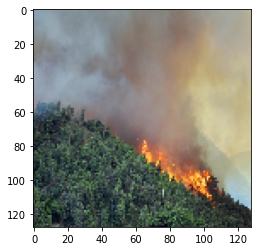

Forest fire
SMe46b5f42d0c62e94a7fb776a4967095d
Fire detected
SMS Sent!


In [39]:
from matplotlib import pyplot as plt
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/drive/MyDrive/Dataset/Dataset/test_set/with fire/Forest_Fire (3).jpg',target_size=(128,128))
Y = image.img_to_array(img1)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img1)
plt.show()
message(val)

1/1 [==============================] - 0s 25ms/step


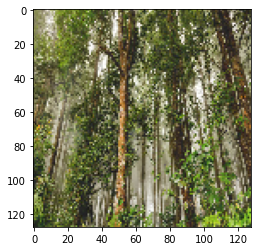

No Fire


In [40]:
img2 = image.load_img('/content/drive/MyDrive/Dataset/Dataset/test_set/forest/091318_LH_forest_loss_main_FREE.jpg',target_size=(128,128))
Y = image.img_to_array(img2)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img2)
plt.show()
message(val)